In [1]:
from dataset import *
from helpers.ipython import *
from helpers.model import *
%matplotlib inline

y = data.get('train', 'y')

# Исходные фичи

In [19]:
data.load(13)

## Матч

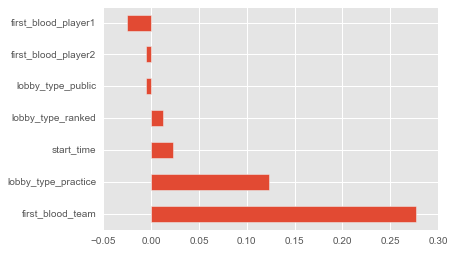

In [28]:
model_lr_explore_l1(pd.concat([data.get('train', 'match'), data.get('train', 'fb')], axis=1), y).plot.barh()

## Игроки

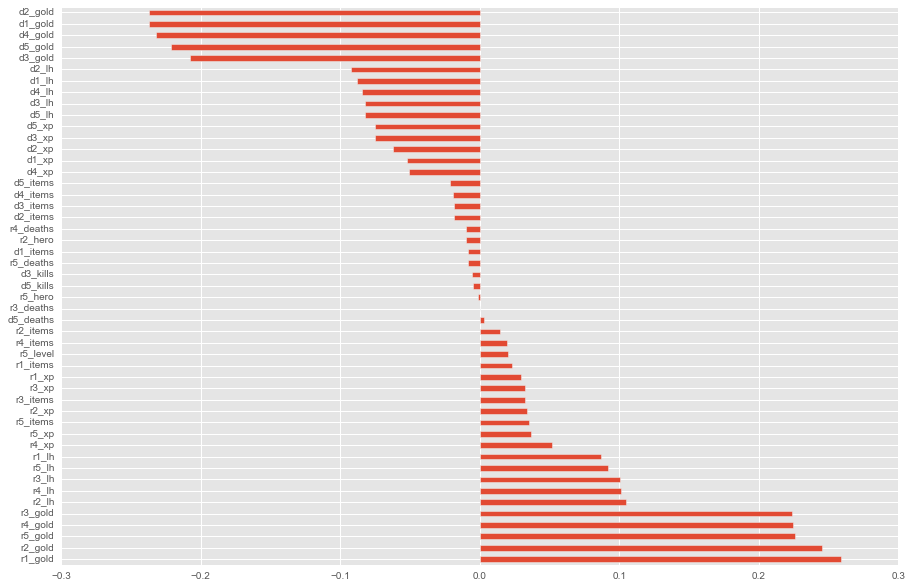

In [22]:
model_lr_explore_l1(data.get('train', 'players'), y).plot.barh(figsize=(15, 10))

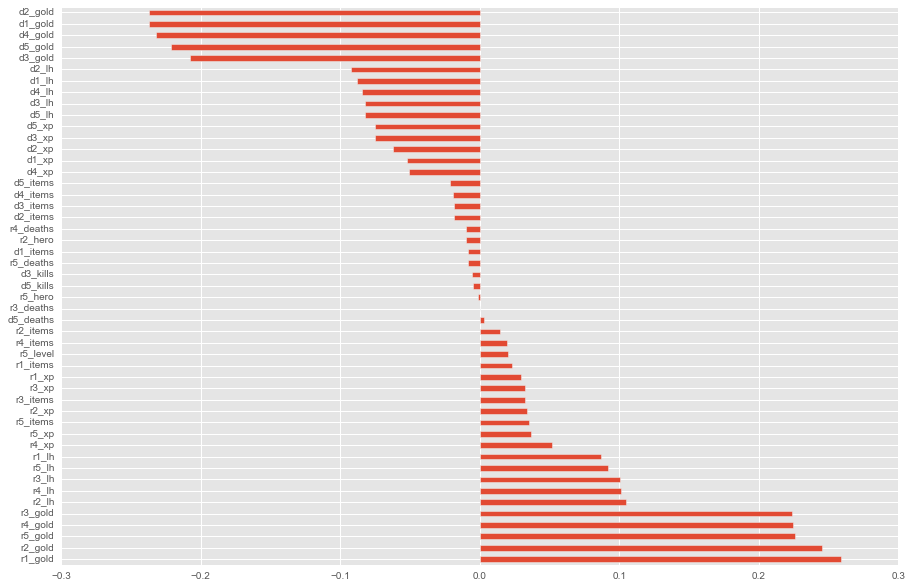

In [18]:
model_lr_explore_l1(data.get('train', 'players').fillna(0), y).plot.barh(figsize=(15, 10))

## Герои

In [2]:
heroes = data.get('train', 'heroes')
hero_weights = model_lr_explore_l1(heroes, y)

**Герои, которые положительно влияют  на победу:**

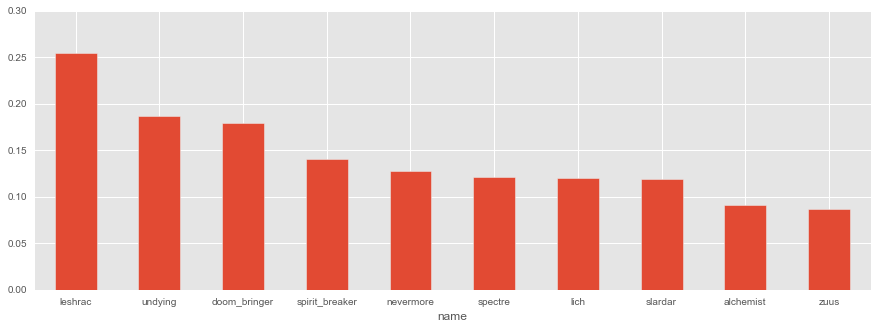

In [3]:
hero_weights.head(10).plot.bar(rot=0, figsize=(15, 5))

**Герои, которые отрицательно влияют на победу:**

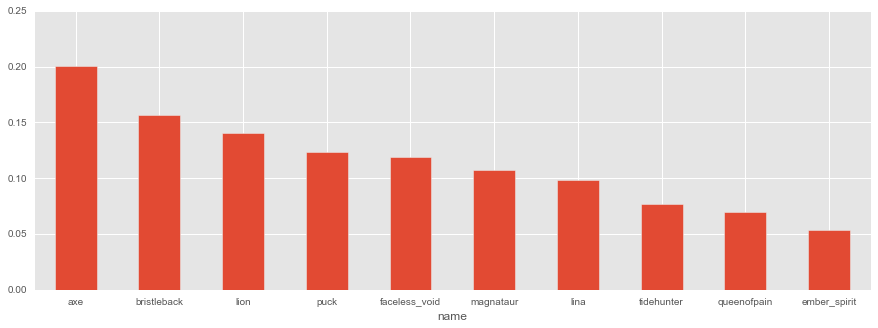

In [7]:
hero_weights.tail(10).abs()[::-1].plot.bar(rot=0, figsize=(15, 5))

## Команда

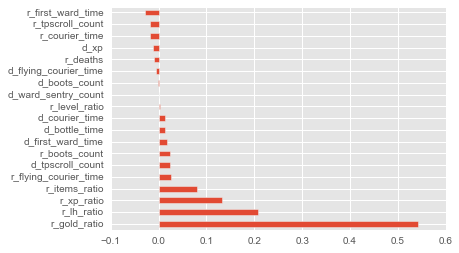

In [25]:
model_lr_explore_l1(data.get('train', 'teams'), y).plot.barh()

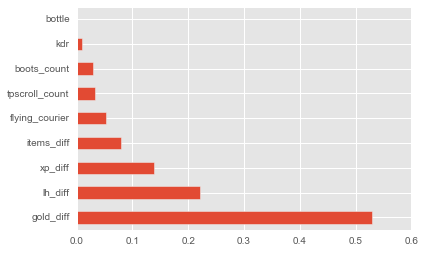

In [26]:
model_lr_explore_l1(data.get('train', 'team_diffs'), y).plot.barh()

# Новые фичи

In [31]:
data.load(33)

## Синергия / анти-синергия героев

In [2]:
synergy = data.get('train', 'synergy_matrix')
anti_synergy = data.get('train', 'anti_synergy_matrix')

### Синергия

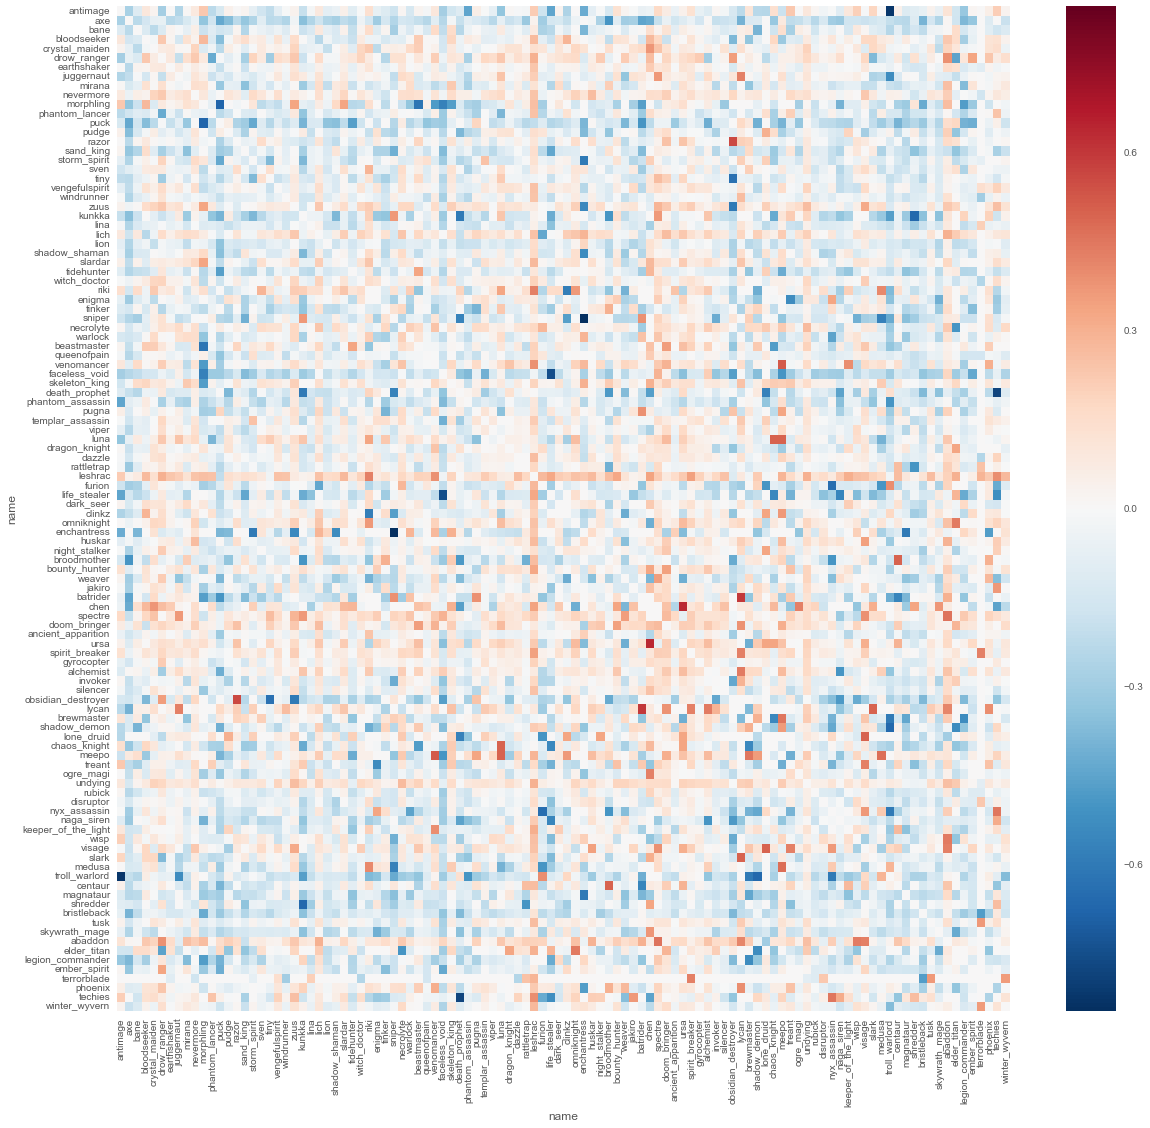

In [74]:
figsize(20, 18)
sns.heatmap(synergy)

### Анти-синергия

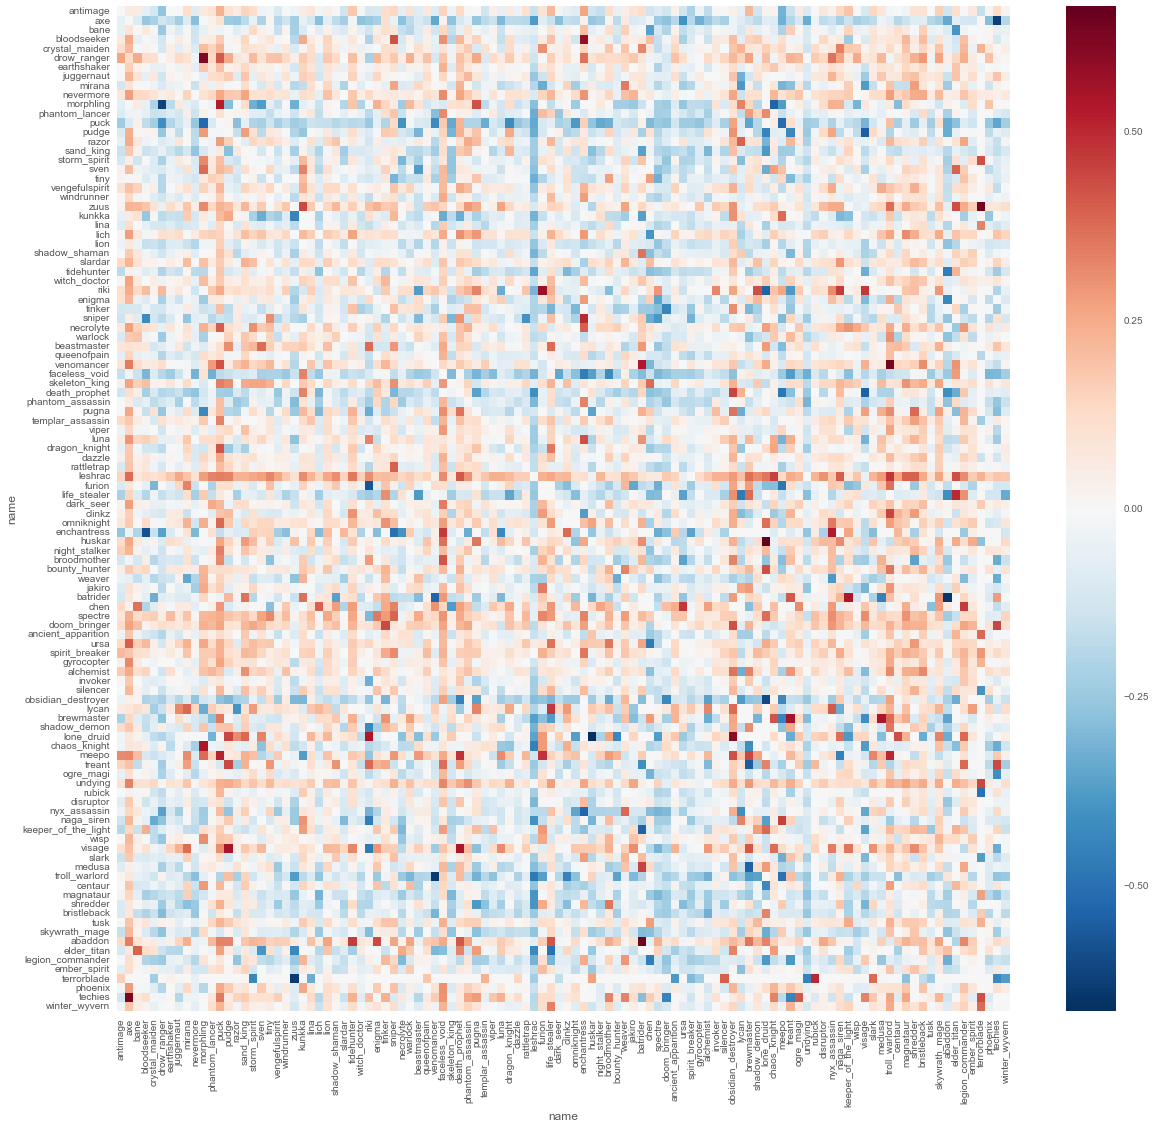

In [75]:
figsize(20, 18)
sns.heatmap(anti_synergy)

### Комбинации героев

In [3]:
def synergy_pair(h1, h2):
    return '{} + {}'.format(max(h1, h2), min(h1, h2))

def anti_synergy_pair(h1, h2):
    return '{} vs {}'.format(h1, h2)

def get_hero_pairs(matrix, pair_func):
    pairs = {}
    for h1, row in matrix.iterrows():
        for h2, val in row.iteritems():
            pairs[pair_func(h1, h2)] = val

    return pd.Series(pairs).sort_values(ascending=False)

synergy_pairs = get_hero_pairs(synergy, synergy_pair)
anti_synergy_pairs = get_hero_pairs(anti_synergy, anti_synergy_pair)

**Самые сильные комбинации:**  

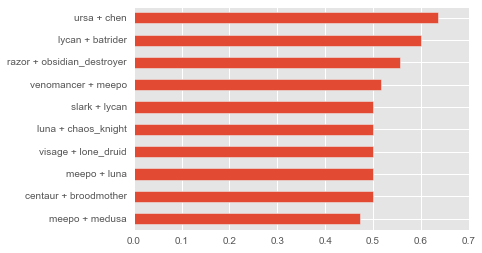

In [51]:
synergy_pairs.head(10).iloc[::-1].plot.barh()

**Самые слабые комбинации:**  

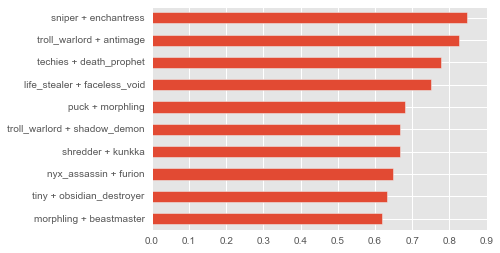

In [48]:
synergy_pairs.tail(10).abs().plot.barh()

**Контр-герои:** 

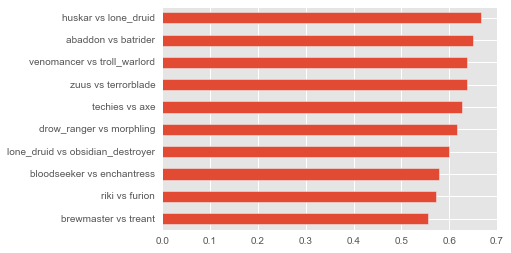

In [52]:
anti_synergy_pairs.head(10).iloc[::-1].plot.barh()

In [16]:
mean_anti_synergy = anti_synergy.mean(axis=1).sort_values(ascending=False)

**Наиболее универсальные герои**

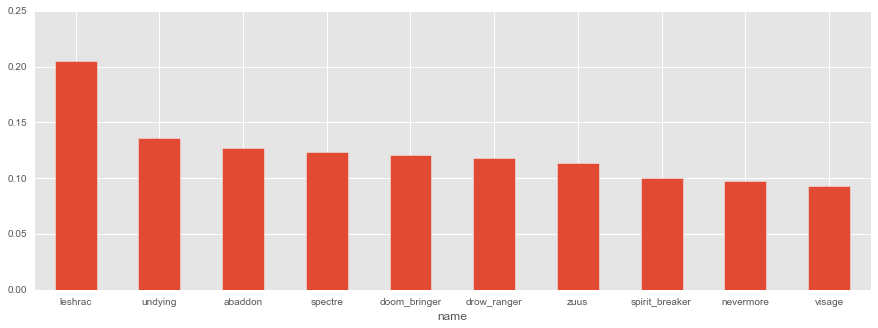

In [41]:
mean_anti_synergy.head(10).plot.bar(rot=0, figsize=(15, 5))

**Наименее универсальные герои**

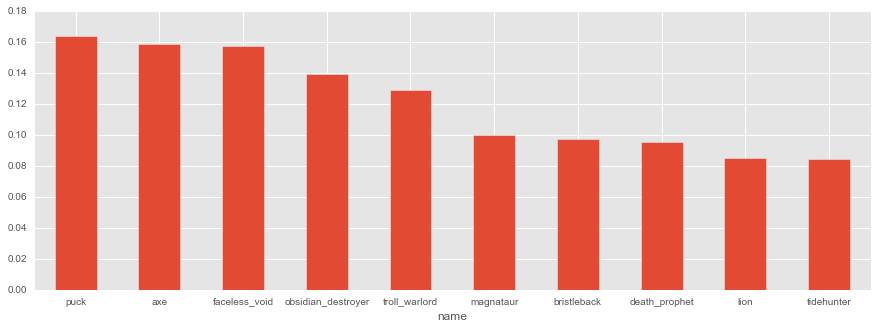

In [55]:
mean_anti_synergy.tail(10).abs().iloc[::-1].plot.bar(rot=0, figsize=(15, 5))

# Модель